# Lab_7

# 1. Write a Python program that computes the value of the Gaussian distribution at a given vector X. Hence, plot the effect of varying mean and variance to the normal distribution. 

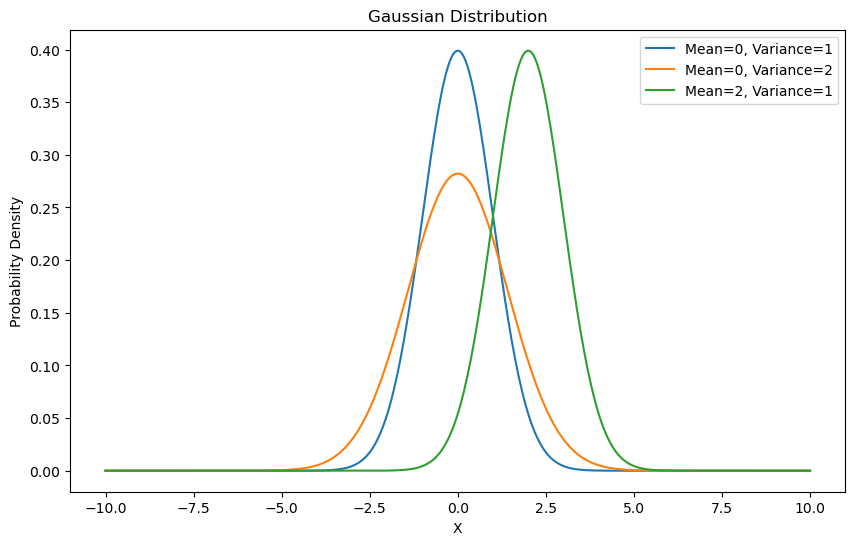

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mean, variance):
    return (1.0 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean) ** 2) / (2 * variance))

# Create a range of x values
x_values = np.linspace(-10, 10, 400)

# Different means and variances
means = [0, 0, 2]
variances = [1, 2, 1]

plt.figure(figsize=(10, 6))
for mean, variance in zip(means, variances):
    plt.plot(x_values, gaussian(x_values, mean, variance), label=f'Mean={mean}, Variance={variance}')

plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


2. Write a python program to implement linear regression. 

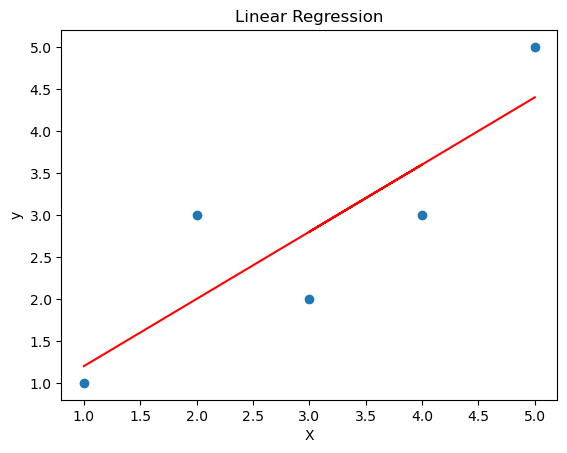

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(X, y):
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias (intercept term)
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)  # Normal equation
    return theta

# Example data
X = np.array([1, 2, 4, 3, 5])
y = np.array([1, 3, 3, 2, 5])

# Fit model
theta = linear_regression(X, y)

# Predict
y_pred = theta[0] + theta[1] * X

# Plot
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


3. Write a python program to implement gradient descent. 

In [3]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = X.shape[0]
    theta = np.zeros(X.shape[1])
    for i in range(iterations):
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradient
    return theta

# Example data
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([1, 2, 2.5])

# Apply gradient descent
theta = gradient_descent(X, y)
print(f'Theta values: {theta}')


Theta values: [0.33247584 0.75037721]


4. Write a python program to classify different flower images using MLP. 

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pathlib

# Load the dataset
dataset = tf.keras.utils.get_file(
    "flower_photos", 
    "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    untar=True)

data_dir = pathlib.Path(dataset)

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Build the MLP model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_ds, validation_data=val_ds, epochs=5)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Epoch 1/5


/Users/sumanpaul/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/sumanpaul/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.2757 - loss: 14.8611 - val_accuracy: 0.3624 - val_loss: 2.5069
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.4227 - loss: 1.8322 - val_accuracy: 0.4142 - val_loss: 2.0121
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4539 - loss: 1.6614 - val_accuracy: 0.3556 - val_loss: 2.1075
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.4998 - loss: 1.4851 - val_accuracy: 0.3678 - val_loss: 2.2929
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.5350 - loss: 1.2924 - val_accuracy: 0.3025 - val_loss: 2.4951


5. Write a python program to classify different flower images using the SVM classifier.

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 1.0


6. Write a python program to classify different flower images using CNN. 

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming the same flower dataset as before

# Build the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5


/Users/sumanpaul/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/sumanpaul/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 372ms/step - accuracy: 0.2838 - loss: 1.7407 - val_accuracy: 0.5204 - val_loss: 1.2138
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 37s 398ms/step - accuracy: 0.5268 - loss: 1.1423 - val_accuracy: 0.5940 - val_loss: 1.0329
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 415ms/step - accuracy: 0.6382 - loss: 0.9291 - val_accuracy: 0.6172 - val_loss: 0.9619
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 420ms/step - accuracy: 0.6905 - loss: 0.7757 - val_accuracy: 0.6608 - val_loss: 0.9025
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 431ms/step - accuracy: 0.7668 - loss: 0.6054 - val_accuracy: 0.6417 - val_loss: 1.0434


7. Write a python program to classify different handwritten character images using the SVM classifier. 

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = datasets.load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.9777777777777777


8. Write a python program to classify different face images using CNN. 

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load your face dataset (placeholder)
# Replace with your actual face dataset loading logic
# Example: lfw = sklearn.datasets.fetch_lfw_people()

# Preprocess data as needed (resizing, normalization, etc.)

# Build the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Adjust the number of classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5


/Users/sumanpaul/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/sumanpaul/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 434ms/step - accuracy: 0.3897 - loss: 1.4738 - val_accuracy: 0.5545 - val_loss: 1.0883
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 439ms/step - accuracy: 0.6032 - loss: 1.0212 - val_accuracy: 0.6253 - val_loss: 1.0360
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 439ms/step - accuracy: 0.6673 - loss: 0.8486 - val_accuracy: 0.6458 - val_loss: 0.9062
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 439ms/step - accuracy: 0.7527 - loss: 0.6439 - val_accuracy: 0.6635 - val_loss: 0.9231
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 445ms/step - accuracy: 0.8282 - loss: 0.4718 - val_accuracy: 0.6390 - val_loss: 1.0955


9. Write a python program to identify a person from the walking style (gait recognition) using convolutional recurrent neural network. 


In [2]:
import pandas as pd
df = pd.read_csv('HuGaDB_v2_various_01_00.csv')
print(df.columns)
 # Update 'subject' to the correct column name
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and preprocess the dataset
def load_preprocess_dataset(csv_file, time_steps=10):
    # Load the CSV file
    df = pd.read_csv(csv_file)
    
    # Inspect the columns to find the correct label for person ID
    print(df.columns)  # Print columns for inspection
    
    # Assuming the correct label is 'PersonID' instead of 'subject'
    feature_columns = [col for col in df.columns if col not in ['PersonID']]  # Exclude label
    X = df[feature_columns].values  # Features
    y = df['PersonID'].values        # Labels (person ID)
    
    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Encode the labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    num_classes = len(np.unique(y))
    
    # Convert features into time steps
    X_seq, y_seq = [], []
    for i in range(0, len(X) - time_steps, time_steps):
        X_seq.append(X[i:i+time_steps, :])
        y_seq.append(y[i+time_steps-1])  # Take the label at the end of the time step
    
    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)
    
    return X_seq, y_seq, num_classes


Index(['Unnamed: 0', 'accelerometer_right_foot_x',
       'accelerometer_right_foot_y', 'accelerometer_right_foot_z',
       'gyroscope_right_foot_x', 'gyroscope_right_foot_y',
       'gyroscope_right_foot_z', 'accelerometer_right_shin_x',
       'accelerometer_right_shin_y', 'accelerometer_right_shin_z',
       'gyroscope_right_shin_x', 'gyroscope_right_shin_y',
       'gyroscope_right_shin_z', 'accelerometer_right_thigh_x',
       'accelerometer_right_thigh_y', 'accelerometer_right_thigh_z',
       'gyroscope_right_thigh_x', 'gyroscope_right_thigh_y',
       'gyroscope_right_thigh_z', 'accelerometer_left_foot_x',
       'accelerometer_left_foot_y', 'accelerometer_left_foot_z',
       'gyroscope_left_foot_x', 'gyroscope_left_foot_y',
       'gyroscope_left_foot_z', 'accelerometer_left_shin_x',
       'accelerometer_left_shin_y', 'accelerometer_left_shin_z',
       'gyroscope_left_shin_x', 'gyroscope_left_shin_y',
       'gyroscope_left_shin_z', 'accelerometer_left_thigh_x',
       'ac

10. Write a python program to classify breast cancer from histopathological images using VGG-16 and DenseNet-201 CNN architectures

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import os

# Define directories for dataset
dataset_dir = 'Breast Cancer Histopathological Images'  # Path to the dataset folder

# Data augmentation and preprocessing
def prepare_data(image_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,  # 20% of data used for validation
        horizontal_flip=True,
        zoom_range=0.2,
        shear_range=0.2
    )
    
    train_generator = datagen.flow_from_directory(
        dataset_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',  # Binary classification (cancerous/non-cancerous)
        subset='training'
    )
    
    validation_generator = datagen.flow_from_directory(
        dataset_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )
    
    return train_generator, validation_generator

# Create a model using a pre-trained VGG-16 architecture
def build_vgg16_model(input_shape=(224, 224, 3)):
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the base model
    for layer in vgg16_base.layers:
        layer.trainable = False
    
    # Add custom layers on top of the base model
    model = models.Sequential()
    model.add(vgg16_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
    
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a model using a pre-trained DenseNet-201 architecture
def build_densenet201_model(input_shape=(224, 224, 3)):
    densenet201_base = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the base model
    for layer in densenet201_base.layers:
        layer.trainable = False
    
    # Add custom layers on top of the base model
    model = models.Sequential()
    model.add(densenet201_base)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
    
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
if __name__ == "__main__":
    image_size = (224, 224)
    batch_size = 32
    
    # Prepare the data
    train_generator, validation_generator = prepare_data(image_size, batch_size)
    
    # Build and train the VGG16 model
    print("Training VGG-16 model...")
    vgg16_model = build_vgg16_model(input_shape=image_size + (3,))
    vgg16_model.fit(train_generator, epochs=10, validation_data=validation_generator)
    vgg16_model.save('breast_cancer_vgg16.h5')
    
    # Build and train the DenseNet201 model
    print("Training DenseNet-201 model...")
    densenet_model = build_densenet201_model(input_shape=image_size + (3,))
    densenet_model.fit(train_generator, epochs=10, validation_data=validation_generator)
    densenet_model.save('breast_cancer_densenet201.h5')
    
    print("Models trained and saved!")


Found 94 images belonging to 2 classes.
Found 22 images belonging to 2 classes.
Training VGG-16 model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
Epoch 1/10


/Users/sumanpaul/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.6483 - loss: 0.6222 - val_accuracy: 1.0000 - val_loss: 0.0726
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 1.0000 - loss: 0.1009 - val_accuracy: 1.0000 - val_loss: 0.0168
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 1.0000 - loss: 0.0213 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 4.2127e-04
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 1.0000 - loss: 7.5678e-04 - val_accuracy: 1.0000 - val_loss: 4.0817e-04
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 1.0000 - loss: 3.2331e-04 - val_accuracy: 1.0000 - val_loss: 3.6966e-04

Training DenseNet-201 model...
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6123 - loss: 0.6299 - val_accuracy: 1.0000 - val_loss: 0.3976
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8927 - loss: 0.3767 - val_accuracy: 1.0000 - val_loss: 0.2785
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9666 - loss: 0.2924 - val_accuracy: 1.0000 - val_loss: 0.1872
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9550 - loss: 0.2261 - val_accuracy: 1.0000 - val_loss: 0.1386
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 0.1429 - val_accuracy: 1.0000 - val_loss: 0.0984
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 0.1006 - val_accuracy: 1.0000 - val_loss: 0.0724
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0839 - val_accuracy: 1.0000 - val_loss: 0.0690
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accura

Models trained and saved!
